**Автоматическое машинное обучение**

Автоматическое машинное обучение (AutoML) 
процесс автоматизации сквозного процесса применения машинного обучения к задачам реального мира. В типичном приложении машинного обучения пользователь должен применить подходящие методы предварительной обработки данных, конструирования признаков, выделения признаков и выбора признаков, которые делают набор данных пригодным для обучения машин. После этих шагов работник должен осуществить выбор алгоритмаи оптимизацию гиперпараметров для максимизации прогнозируемой производительности конечной модели. Поскольку многие из этих шагов не могут осуществить люди, не будучи экспертами, был предложен подход AutoML как основанное на искусственном интеллекте решение для всё возрастающей необходимости применения машинного обучения. Автоматизация сквозного процесса применения машинного обучения даёт преимущество получения более простых решений, более быстрого создания таких решений и моделей, которые часто превосходят модели, построенные вручную.

Автоматическое машинное обучение может иметь целью различные стадии процесса:

автоматическая подготовка данных и сбор и сохранение данных (из сырых данных и разнообразных форматов):
автоматическое определение типа столбца, например, булевские данные, дискретные численные данные, непрерывные числовые значения или текст;
автоматическое определение смысла столбца; например, цель, метка, поле районирования, числовой признак, текстовая категория или свободный текст;
автоматическое обнаружение задач, например, двоичная классификация, регрессия, выделение кластеров или ранжирование;
автоматическое конструирование признаков:
выбор признаков
выделение признаков
метаобучение и перенос обучения
обнаружение и обработка асимметричных данных или отсутствующих значений;
автоматический выбор модели;
оптимизация гиперпараметров алгоритма обучения и характеризации;
автоматический выбор каналов по времени, памяти и ограничений сложности;
автоматический выбор метрик оценки и процедур валидации;
автоматическая проверка задач:
определение утечки;
определение ошибок в конфигурации;
автоматический анализ полученных результатов;
пользовательские результаты и визуализация для автоматического обучения машин

**Аспекты AutoML**

Импутация, горячее кодирование, стандартизация
Выбор признаков и / или извлечение признаков (например, PCA)
Целевое количество / тег / кодирование категориальных функций
 

Поиск по декартовой сетке или поиск по случайной сетке
Оптимизация байесовских гиперпараметров
Индивидуальные модели можно настроить с помощью набора для проверки.
 

Наборы часто превосходят отдельные модели
Укладка / Суперобучение (Вольперт, Брейман)
Подбор ансамбля (Каруана)




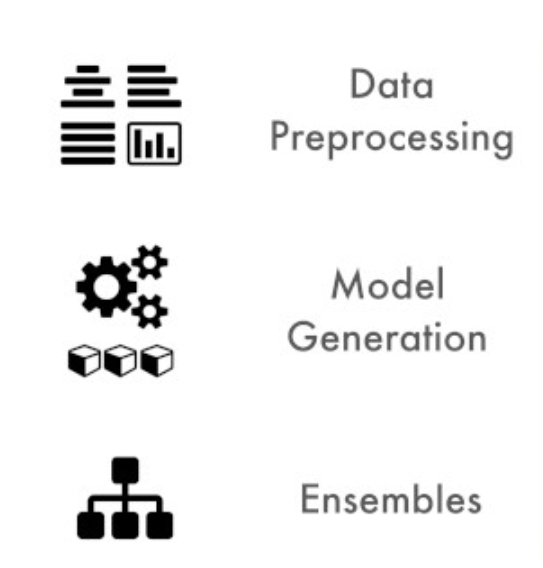

**H2O AutoML**

Функция автоматического машинного обучения (AutoML) автоматизирует процесс обучения модели машинного обучения с учителем. Текущая версия AutoML обучает и перекрестно проверяет следующие алгоритмы: три предварительно заданные модели XGBoost GBM (Gradient Boosting Machine), одна фиксированная сетка GLM, один случайный лес по умолчанию (DRF), пять предварительно заданных GBM H2O, одна глубокая нейронная сеть По умолчанию, это чрезвычайно рандомизированный лес (XRT), случайная сетка GBM XGBoost, случайная сетка GBM H2O и случайная сетка глубокой нейронной сети. В некоторых случаях на выполнение всех алгоритмов может не хватить времени, поэтому некоторые из них могут отсутствовать в таблице лидеров. AutoML обучает несколько составных моделей сборок во время выполнения. Обучаются два типа составных моделей множеств: одна из всех доступных моделей и одна из лучших моделей каждого типа.

**Тематическое исследование**

Есть база клиентов ресторана, где они идентифицируются по ID, анализ будет проводиться по десяти моделям,
Будет создана распределенная случайная модель, а линейная модель, в свою очередь, будет использоваться для обучения Automl H2O, чтобы найти наиболее подходящую модель и сэкономить время по сравнению с другими методами.

Он проанализирует важность переменных для анализа Automl H2O.

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 20 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=499a2650b3631637325fd00202d6040ce4a9050921128e8b17c4c86f7c81d30c
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [4]:
 import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphhl0egg6
  JVM stdout: /tmp/tmphhl0egg6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphhl0egg6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_69fj38
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [9]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [11]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes


In [12]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [13]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [14]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [15]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
10:34:14.435: Project: AutoML_1_20211119_103414
10:34:14.436: Cross-validation disabled by user: no fold column nor nfolds > 1.
10:34:14.452: Setting stopping tolerance adaptively based on the training frame: 0.014227759830611805
10:34:14.453: Build control seed: 10
10:34:14.453: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
10:34:14.547: training frame: Frame key: AutoML_1_20211119_103414_training_py_2_sid_8bef    cols: 21    rows: 4465  chunks: 8    size: 295396  checksum: -8095659959687156242
10:34:14.547: validation frame: Frame key: py_4_sid_8bef    cols: 21    rows: 1071  chunks: 8    size: 139433  checksum: 675221711026973127
10:34:14.555: leaderboard frame: Frame key: AutoML_1_20211119_103414_leaderboard_py_2_sid_8bef    cols: 21    rows: 475  chunks: 8    size: 124372  checksum: 1440454495429940264
10:34:14.556: blending frame: NULL
10:3

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,45.0,45.0,17964.0,6.0,12.0,8.088889,25.0,29.0,27.0




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11810440279174826
RMSE: 0.3436632112864981
LogLoss: 0.36774246771765806
Mean Per-Class Error: 0.19653988396088629
AUC: 0.8859119427530667
AUCPR: 0.7262792737692615
Gini: 0.7718238855061335

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30103016552422024: 


,,No,Yes,Error,Rate
0,No,2650.0,649.0,0.1967,(649.0/3299.0)
1,Yes,230.0,936.0,0.1973,(230.0/1166.0)
2,Total,2880.0,1585.0,0.1969,(879.0/4465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.301030,0.680480,222.0
1,max f2,0.163231,0.783920,293.0
2,max f0point5,0.534818,0.687919,127.0
3,max accuracy,0.461005,0.832027,156.0
4,max precision,0.903831,1.000000,0.0
5,max recall,0.019859,1.000000,387.0
6,max specificity,0.903831,1.000000,0.0
7,max absolute_mcc,0.434787,0.557177,167.0
8,max min_per_class_accuracy,0.301030,0.802744,222.0
9,max mean_per_class_accuracy,0.297178,0.803460,224.0



Gains/Lift Table: Avg response rate: 26.11 %, avg score: 26.29 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.862373,3.574042,3.574042,0.933333,0.872810,0.933333,0.872810,0.036021,0.036021,257.404231,257.404231,0.035111
1,2,0.020157,0.846884,3.318754,3.446398,0.866667,0.854859,0.900000,0.863834,0.033448,0.069468,231.875357,244.639794,0.066740
2,3,0.030011,0.821750,3.655271,3.514983,0.954545,0.834968,0.917910,0.854356,0.036021,0.105489,265.527054,251.498298,0.102155
3,4,0.040090,0.786974,3.318754,3.465652,0.866667,0.803297,0.905028,0.841520,0.033448,0.138937,231.875357,246.565156,0.133783
4,5,0.050168,0.756913,3.403850,3.453236,0.888889,0.772740,0.901786,0.827702,0.034305,0.173242,240.384982,245.323603,0.166573
5,6,0.100112,0.657775,2.884877,3.169692,0.753363,0.704615,0.827740,0.766297,0.144082,0.317324,188.487720,216.969236,0.293984
6,7,0.150056,0.585962,2.455580,2.932010,0.641256,0.621945,0.765672,0.718251,0.122642,0.439966,145.558000,193.201019,0.392376
7,8,0.200000,0.512333,2.352549,2.787307,0.614350,0.547852,0.727884,0.675699,0.117496,0.557461,135.254867,178.730703,0.483803
8,9,0.300112,0.370729,1.670514,2.414765,0.436242,0.438256,0.630597,0.596492,0.167238,0.724700,67.051354,141.476473,0.574654
9,10,0.400000,0.258771,1.193446,2.109777,0.311659,0.310547,0.550952,0.525086,0.119211,0.843911,19.344622,110.977702,0.600807




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.12824552180056115
RMSE: 0.3581138391636955
LogLoss: 0.3969321576196165
Mean Per-Class Error: 0.21595251881876087
AUC: 0.8615228720324262
AUCPR: 0.7008865028950125
Gini: 0.7230457440648523

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2861720557284833: 


,,No,Yes,Error,Rate
0,No,599.0,186.0,0.2369,(186.0/785.0)
1,Yes,60.0,226.0,0.2098,(60.0/286.0)
2,Total,659.0,412.0,0.2297,(246.0/1071.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.286172,0.647564,224.0
1,max f2,0.126921,0.774487,303.0
2,max f0point5,0.543591,0.665434,114.0
3,max accuracy,0.543591,0.816060,114.0
4,max precision,0.888429,1.000000,0.0
5,max recall,0.011868,1.000000,396.0
6,max specificity,0.888429,1.000000,0.0
7,max absolute_mcc,0.458748,0.511747,150.0
8,max min_per_class_accuracy,0.299135,0.770701,219.0
9,max mean_per_class_accuracy,0.228050,0.784047,253.0



Gains/Lift Table: Avg response rate: 26.70 %, avg score: 27.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010271,0.862654,3.404323,3.404323,0.909091,0.872616,0.909091,0.872616,0.034965,0.034965,240.432295,240.432295,0.033691
1,2,0.020542,0.854599,3.404323,3.404323,0.909091,0.858240,0.909091,0.865428,0.034965,0.069930,240.432295,240.432295,0.067382
2,3,0.030812,0.842125,3.404323,3.404323,0.909091,0.846778,0.909091,0.859211,0.034965,0.104895,240.432295,240.432295,0.101073
3,4,0.040149,0.822571,3.370280,3.396406,0.900000,0.833380,0.906977,0.853204,0.031469,0.136364,237.027972,239.640592,0.131268
4,5,0.050420,0.793049,3.063891,3.328671,0.818182,0.804059,0.888889,0.843193,0.031469,0.167832,206.389065,232.867133,0.160189
5,6,0.100840,0.681370,2.773893,3.051282,0.740741,0.732752,0.814815,0.787973,0.139860,0.307692,177.389277,205.128205,0.282215
6,7,0.150327,0.593647,2.260984,2.791122,0.603774,0.634033,0.745342,0.737297,0.111888,0.419580,126.098430,179.112192,0.367351
7,8,0.201681,0.521542,1.974507,2.583188,0.527273,0.556971,0.689815,0.691381,0.101399,0.520979,97.450731,158.318765,0.435629
8,9,0.300654,0.396313,1.625082,2.267787,0.433962,0.454514,0.605590,0.613406,0.160839,0.681818,62.508246,126.778656,0.520035
9,10,0.400560,0.271891,1.189922,1.998949,0.317757,0.324551,0.533800,0.541360,0.118881,0.800699,18.992223,99.894860,0.545922




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-19 10:34:21,0.015 sec,0.0,0.439257,0.574248,0.500000,0.261142,1.000000,0.738858,0.442453,0.580382,0.500000,0.267040,1.000000,0.732960
1,,2021-11-19 10:34:22,0.644 sec,5.0,0.392742,0.477541,0.854217,0.665219,3.354159,0.211870,0.391191,0.474700,0.868320,0.705307,3.379413,0.209150
2,,2021-11-19 10:34:22,0.968 sec,10.0,0.373083,0.436308,0.860972,0.679201,3.360433,0.201120,0.372352,0.435715,0.865275,0.701480,3.432692,0.186741
3,,2021-11-19 10:34:23,1.244 sec,15.0,0.363118,0.413326,0.864687,0.687146,3.496346,0.205375,0.362218,0.412565,0.867814,0.704624,3.404323,0.213819
4,,2021-11-19 10:34:23,1.506 sec,20.0,0.357697,0.400228,0.868504,0.693120,3.403850,0.192161,0.358278,0.402082,0.868293,0.710147,3.404323,0.193277
5,,2021-11-19 10:34:23,1.742 sec,25.0,0.353892,0.391021,0.872142,0.700513,3.496346,0.190817,0.357208,0.398296,0.866705,0.705856,3.456697,0.225957
6,,2021-11-19 10:34:23,1.965 sec,30.0,0.350961,0.383788,0.875691,0.706929,3.516733,0.199552,0.356652,0.395802,0.865616,0.705455,3.404323,0.197946
7,,2021-11-19 10:34:24,2.178 sec,35.0,0.348226,0.377637,0.879333,0.713948,3.534767,0.192609,0.356553,0.395268,0.864679,0.705938,3.432692,0.186741
8,,2021-11-19 10:34:24,2.411 sec,40.0,0.345687,0.372077,0.883095,0.720622,3.534767,0.190146,0.357381,0.396334,0.862469,0.702334,3.404323,0.194211
9,,2021-11-19 10:34:24,2.603 sec,45.0,0.343663,0.367742,0.885912,0.726279,3.574042,0.196865,0.358114,0.396932,0.861523,0.700887,3.404323,0.229692



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract,501.559906,1.000000,0.309313
1,tenure,232.864349,0.464280,0.143608
2,OnlineSecurity,187.928513,0.374688,0.115896
3,TotalCharges,146.406036,0.291901,0.090289
4,MonthlyCharges,131.536591,0.262255,0.081119
5,InternetService,120.748047,0.240745,0.074466
6,PaymentMethod,71.917976,0.143389,0.044352
7,TechSupport,51.626625,0.102932,0.031838
8,PaperlessBilling,33.612061,0.067015,0.020729
9,OnlineBackup,31.680454,0.063164,0.019537


In [16]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [17]:
lb = aml.leaderboard

In [18]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20211119_103414,0.82379,0.453387,0.65695,0.255542,0.387665,0.150284
XGBoost_1_AutoML_1_20211119_103414,0.816708,0.475995,0.611685,0.237864,0.395318,0.156276
GLM_1_AutoML_1_20211119_103414,0.812554,0.462844,0.617298,0.254284,0.39339,0.154756
GBM_4_AutoML_1_20211119_103414,0.812023,0.48562,0.630558,0.25783,0.398592,0.158875
XGBoost_3_AutoML_1_20211119_103414,0.809604,0.481506,0.623143,0.26809,0.398971,0.159178
GBM_3_AutoML_1_20211119_103414,0.808607,0.481484,0.628545,0.25565,0.398778,0.159024
XRT_1_AutoML_1_20211119_103414,0.805115,0.468817,0.623941,0.25347,0.394914,0.155957
XGBoost_2_AutoML_1_20211119_103414,0.803368,0.493242,0.622127,0.270161,0.401302,0.161043
GBM_2_AutoML_1_20211119_103414,0.800072,0.487891,0.613553,0.266636,0.402038,0.161634
DRF_1_AutoML_1_20211119_103414,0.789953,0.560277,0.615261,0.284889,0.404633,0.163728


In [19]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [20]:
churn_pred.head()

predict,No,Yes
Yes,0.320091,0.679909
Yes,0.160069,0.839931
No,0.972745,0.0272547
No,0.984241,0.0157589
Yes,0.46889,0.53111
Yes,0.537037,0.462963
Yes,0.44141,0.55859
No,0.981163,0.0188367
Yes,0.663719,0.336281
No,0.736894,0.263106


In [21]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13320811812678215
RMSE: 0.3649768734136208
LogLoss: 0.4133455291228581
Mean Per-Class Error: 0.23053721965019358
AUC: 0.8508181262468547
AUCPR: 0.6836456716560335
Gini: 0.7016362524937094

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45926308874926525: 


,,No,Yes,Error,Rate
0,No,671.0,80.0,0.1065,(80.0/751.0)
1,Yes,108.0,173.0,0.3843,(108.0/281.0)
2,Total,779.0,253.0,0.1822,(188.0/1032.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.459263,0.647940,149.0
1,max f2,0.115470,0.762565,307.0
2,max f0point5,0.470463,0.676541,144.0
3,max accuracy,0.470463,0.820736,144.0
4,max precision,0.903821,1.000000,0.0
5,max recall,0.012420,1.000000,395.0
6,max specificity,0.903821,1.000000,0.0
7,max absolute_mcc,0.466115,0.530578,145.0
8,max min_per_class_accuracy,0.290400,0.761566,216.0
9,max mean_per_class_accuracy,0.223749,0.769463,247.0



Gains/Lift Table: Avg response rate: 27.23 %, avg score: 26.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010659,0.865840,3.004853,3.004853,0.818182,0.874511,0.818182,0.874511,0.032028,0.032028,200.485280,200.485280,0.029365
1,2,0.020349,0.838097,3.305338,3.147941,0.900000,0.850489,0.857143,0.863072,0.032028,0.064057,230.533808,214.794103,0.060062
2,3,0.030039,0.813501,3.305338,3.198714,0.900000,0.825455,0.870968,0.850937,0.032028,0.096085,230.533808,219.871427,0.090759
3,4,0.040698,0.751291,3.338725,3.235384,0.909091,0.781375,0.880952,0.832719,0.035587,0.131673,233.872533,223.538383,0.125015
4,5,0.050388,0.736672,2.938078,3.178210,0.800000,0.743100,0.865385,0.815484,0.028470,0.160142,193.807829,217.820969,0.150821
5,6,0.100775,0.659432,2.683822,2.931016,0.730769,0.703308,0.798077,0.759396,0.135231,0.295374,168.382152,193.101560,0.267411
6,7,0.150194,0.597356,2.448399,2.772219,0.666667,0.623060,0.754839,0.714537,0.120996,0.416370,144.839858,177.221903,0.365771
7,8,0.200581,0.521834,2.260060,2.643561,0.615385,0.557048,0.719807,0.674975,0.113879,0.530249,126.006022,164.356078,0.453019
8,9,0.300388,0.360741,1.390595,2.227253,0.378641,0.442255,0.606452,0.597652,0.138790,0.669039,39.059531,122.725290,0.506589
9,10,0.400194,0.270573,1.069689,1.938563,0.291262,0.312084,0.527845,0.526433,0.106762,0.775801,6.968870,93.856255,0.516147


In [22]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [23]:
model_ids

['GBM_1_AutoML_1_20211119_103414',
 'XGBoost_1_AutoML_1_20211119_103414',
 'GLM_1_AutoML_1_20211119_103414',
 'GBM_4_AutoML_1_20211119_103414',
 'XGBoost_3_AutoML_1_20211119_103414',
 'GBM_3_AutoML_1_20211119_103414',
 'XRT_1_AutoML_1_20211119_103414',
 'XGBoost_2_AutoML_1_20211119_103414',
 'GBM_2_AutoML_1_20211119_103414',
 'DRF_1_AutoML_1_20211119_103414']

In [24]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_1_20211119_103414


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10602720402053976
RMSE: 0.3256181874842678
LogLoss: 0.3368958246299564
Mean Per-Class Error: 0.1764040977124416
AUC: 0.9058142781455163
AUCPR: 0.7807268826765655
Gini: 0.8116285562910326

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42026425153017044: 


,,No,Yes,Error,Rate
0,No,2975.0,324.0,0.0982,(324.0/3299.0)
1,Yes,334.0,832.0,0.2864,(334.0/1166.0)
2,Total,3309.0,1156.0,0.1474,(658.0/4465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.420264,0.716624,181.0
1,max f2,0.186241,0.796506,282.0
2,max f0point5,0.498802,0.732222,149.0
3,max accuracy,0.432239,0.854199,176.0
4,max precision,0.961423,1.000000,0.0
5,max recall,0.008675,1.000000,394.0
6,max specificity,0.961423,1.000000,0.0
7,max absolute_mcc,0.432239,0.617813,176.0
8,max min_per_class_accuracy,0.305680,0.822370,227.0
9,max mean_per_class_accuracy,0.285700,0.823596,235.0



Gains/Lift Table: Avg response rate: 26.11 %, avg score: 26.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.923906,3.744235,3.744235,0.977778,0.936683,0.977778,0.936683,0.037736,0.037736,274.423480,274.423480,0.037433
1,2,0.020157,0.897708,3.659139,3.701687,0.955556,0.912715,0.966667,0.924699,0.036878,0.074614,265.913856,270.168668,0.073705
2,3,0.030011,0.871477,3.307150,3.572137,0.863636,0.885743,0.932836,0.911907,0.032590,0.107204,230.714954,257.213717,0.104476
3,4,0.040090,0.844867,3.659139,3.594009,0.955556,0.859062,0.938547,0.898622,0.036878,0.144082,265.913856,259.400903,0.140748
4,5,0.050168,0.822926,3.233657,3.521617,0.844444,0.833060,0.919643,0.885451,0.032590,0.176672,223.365733,252.161694,0.171216
5,6,0.100112,0.718248,3.211143,3.366727,0.838565,0.765193,0.879195,0.825457,0.160377,0.337050,221.114307,236.672730,0.320681
6,7,0.150056,0.617358,2.764674,3.166342,0.721973,0.666733,0.826866,0.772628,0.138079,0.475129,176.467398,216.634239,0.439966
7,8,0.200000,0.521385,2.369721,2.967410,0.618834,0.568988,0.774916,0.721775,0.118353,0.593482,136.972056,196.740995,0.532554
8,9,0.300112,0.359548,1.747614,2.560508,0.456376,0.437229,0.668657,0.626855,0.174957,0.768439,74.761417,156.050792,0.633853
9,10,0.400000,0.241342,1.081829,2.191252,0.282511,0.297782,0.572228,0.544679,0.108062,0.876501,8.182895,119.125214,0.644916




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13703226572539506
RMSE: 0.3701786943158602
LogLoss: 0.4254917805521897
Mean Per-Class Error: 0.240497082535299
AUC: 0.8417976927531068
AUCPR: 0.6672039561917299
Gini: 0.6835953855062136

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3156764507293701: 


,,No,Yes,Error,Rate
0,No,627.0,158.0,0.2013,(158.0/785.0)
1,Yes,80.0,206.0,0.2797,(80.0/286.0)
2,Total,707.0,364.0,0.2222,(238.0/1071.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.315676,0.633846,215.0
1,max f2,0.096967,0.752688,317.0
2,max f0point5,0.556036,0.655738,123.0
3,max accuracy,0.471222,0.813259,154.0
4,max precision,0.955762,1.000000,0.0
5,max recall,0.010687,1.000000,391.0
6,max specificity,0.955762,1.000000,0.0
7,max absolute_mcc,0.471222,0.508851,154.0
8,max min_per_class_accuracy,0.270066,0.755414,235.0
9,max mean_per_class_accuracy,0.315676,0.759503,215.0



Gains/Lift Table: Avg response rate: 26.70 %, avg score: 26.58 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011204,0.924884,3.432692,3.432692,0.916667,0.934970,0.916667,0.934970,0.038462,0.038462,243.269231,243.269231,0.037188
1,2,0.020542,0.898017,3.370280,3.404323,0.900000,0.911233,0.909091,0.924181,0.031469,0.069930,237.027972,240.432295,0.067382
2,3,0.030812,0.881317,2.383026,3.063891,0.636364,0.890045,0.818182,0.912802,0.024476,0.094406,138.302606,206.389065,0.086762
3,4,0.040149,0.855858,3.744755,3.222231,1.000000,0.871005,0.860465,0.903082,0.034965,0.129371,274.475524,222.223126,0.121727
4,5,0.050420,0.836497,2.383026,3.051282,0.636364,0.846840,0.814815,0.891625,0.024476,0.153846,138.302606,205.128205,0.141107
5,6,0.100840,0.719324,2.843240,2.947261,0.759259,0.783530,0.787037,0.837578,0.143357,0.297203,184.324009,194.726107,0.267903
6,7,0.150327,0.630995,2.260984,2.721344,0.603774,0.680899,0.726708,0.786000,0.111888,0.409091,126.098430,172.134387,0.353040
7,8,0.200747,0.534870,2.219114,2.595202,0.592593,0.576090,0.693023,0.733279,0.111888,0.520979,121.911422,159.520247,0.436903
8,9,0.300654,0.371020,1.399909,2.198009,0.373832,0.454731,0.586957,0.640718,0.139860,0.660839,39.990850,119.800851,0.491412
9,10,0.400560,0.234964,1.084929,1.920387,0.289720,0.302263,0.512821,0.556301,0.108392,0.769231,8.492909,92.038731,0.502989




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-19 10:34:14,0.304 sec,0.0,0.500000,0.693147,0.500000,0.261142,1.000000,0.738858,0.500000,0.693147,0.500000,0.267040,1.000000,0.732960
1,,2021-11-19 10:34:15,0.899 sec,5.0,0.363003,0.422216,0.866854,0.694635,3.493425,0.206943,0.366095,0.427241,0.862766,0.695917,3.245455,0.199813
2,,2021-11-19 10:34:16,1.383 sec,10.0,0.348209,0.381850,0.877578,0.713305,3.496346,0.182531,0.363786,0.410370,0.851955,0.691314,3.404323,0.216620
3,,2021-11-19 10:34:16,1.869 sec,15.0,0.341208,0.365835,0.886048,0.733990,3.488946,0.189922,0.364015,0.410465,0.850361,0.691606,3.744755,0.207283
4,,2021-11-19 10:34:17,2.382 sec,20.0,0.335766,0.355367,0.892782,0.752588,3.744235,0.180963,0.364777,0.410961,0.850372,0.688333,3.404323,0.219421
5,,2021-11-19 10:34:17,2.818 sec,25.0,0.330392,0.345695,0.899191,0.769896,3.744235,0.166181,0.367995,0.420266,0.844644,0.669995,3.404323,0.226891
6,,2021-11-19 10:34:17,3.137 sec,30.0,0.325618,0.336896,0.905814,0.780727,3.744235,0.147368,0.370179,0.425492,0.841798,0.667204,3.432692,0.222222



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,599.517395,1.000000,0.172783
1,TotalCharges,595.460754,0.993233,0.171614
2,tenure,553.387390,0.923055,0.159488
3,MonthlyCharges,389.086090,0.648999,0.112136
4,OnlineSecurity.No,221.221771,0.369000,0.063757
5,InternetService.Fiber optic,215.531250,0.359508,0.062117
6,PaymentMethod.Electronic check,101.036964,0.168530,0.029119
7,TechSupport.No,85.088142,0.141928,0.024523
8,Contract.Two year,74.198128,0.123763,0.021384
9,OnlineBackup.No,60.638756,0.101146,0.017476



See the whole table with table.as_data_frame()


In [25]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [26]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [27]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 15,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 10,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [28]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_1_20211119_103414


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10602720402053976
RMSE: 0.3256181874842678
LogLoss: 0.3368958246299564
Mean Per-Class Error: 0.1764040977124416
AUC: 0.9058142781455163
AUCPR: 0.7807268826765655
Gini: 0.8116285562910326

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42026425153017044: 


,,No,Yes,Error,Rate
0,No,2975.0,324.0,0.0982,(324.0/3299.0)
1,Yes,334.0,832.0,0.2864,(334.0/1166.0)
2,Total,3309.0,1156.0,0.1474,(658.0/4465.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.420264,0.716624,181.0
1,max f2,0.186241,0.796506,282.0
2,max f0point5,0.498802,0.732222,149.0
3,max accuracy,0.432239,0.854199,176.0
4,max precision,0.961423,1.000000,0.0
5,max recall,0.008675,1.000000,394.0
6,max specificity,0.961423,1.000000,0.0
7,max absolute_mcc,0.432239,0.617813,176.0
8,max min_per_class_accuracy,0.305680,0.822370,227.0
9,max mean_per_class_accuracy,0.285700,0.823596,235.0



Gains/Lift Table: Avg response rate: 26.11 %, avg score: 26.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.923906,3.744235,3.744235,0.977778,0.936683,0.977778,0.936683,0.037736,0.037736,274.423480,274.423480,0.037433
1,2,0.020157,0.897708,3.659139,3.701687,0.955556,0.912715,0.966667,0.924699,0.036878,0.074614,265.913856,270.168668,0.073705
2,3,0.030011,0.871477,3.307150,3.572137,0.863636,0.885743,0.932836,0.911907,0.032590,0.107204,230.714954,257.213717,0.104476
3,4,0.040090,0.844867,3.659139,3.594009,0.955556,0.859062,0.938547,0.898622,0.036878,0.144082,265.913856,259.400903,0.140748
4,5,0.050168,0.822926,3.233657,3.521617,0.844444,0.833060,0.919643,0.885451,0.032590,0.176672,223.365733,252.161694,0.171216
5,6,0.100112,0.718248,3.211143,3.366727,0.838565,0.765193,0.879195,0.825457,0.160377,0.337050,221.114307,236.672730,0.320681
6,7,0.150056,0.617358,2.764674,3.166342,0.721973,0.666733,0.826866,0.772628,0.138079,0.475129,176.467398,216.634239,0.439966
7,8,0.200000,0.521385,2.369721,2.967410,0.618834,0.568988,0.774916,0.721775,0.118353,0.593482,136.972056,196.740995,0.532554
8,9,0.300112,0.359548,1.747614,2.560508,0.456376,0.437229,0.668657,0.626855,0.174957,0.768439,74.761417,156.050792,0.633853
9,10,0.400000,0.241342,1.081829,2.191252,0.282511,0.297782,0.572228,0.544679,0.108062,0.876501,8.182895,119.125214,0.644916




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13703226572539506
RMSE: 0.3701786943158602
LogLoss: 0.4254917805521897
Mean Per-Class Error: 0.240497082535299
AUC: 0.8417976927531068
AUCPR: 0.6672039561917299
Gini: 0.6835953855062136

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3156764507293701: 


,,No,Yes,Error,Rate
0,No,627.0,158.0,0.2013,(158.0/785.0)
1,Yes,80.0,206.0,0.2797,(80.0/286.0)
2,Total,707.0,364.0,0.2222,(238.0/1071.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.315676,0.633846,215.0
1,max f2,0.096967,0.752688,317.0
2,max f0point5,0.556036,0.655738,123.0
3,max accuracy,0.471222,0.813259,154.0
4,max precision,0.955762,1.000000,0.0
5,max recall,0.010687,1.000000,391.0
6,max specificity,0.955762,1.000000,0.0
7,max absolute_mcc,0.471222,0.508851,154.0
8,max min_per_class_accuracy,0.270066,0.755414,235.0
9,max mean_per_class_accuracy,0.315676,0.759503,215.0



Gains/Lift Table: Avg response rate: 26.70 %, avg score: 26.58 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011204,0.924884,3.432692,3.432692,0.916667,0.934970,0.916667,0.934970,0.038462,0.038462,243.269231,243.269231,0.037188
1,2,0.020542,0.898017,3.370280,3.404323,0.900000,0.911233,0.909091,0.924181,0.031469,0.069930,237.027972,240.432295,0.067382
2,3,0.030812,0.881317,2.383026,3.063891,0.636364,0.890045,0.818182,0.912802,0.024476,0.094406,138.302606,206.389065,0.086762
3,4,0.040149,0.855858,3.744755,3.222231,1.000000,0.871005,0.860465,0.903082,0.034965,0.129371,274.475524,222.223126,0.121727
4,5,0.050420,0.836497,2.383026,3.051282,0.636364,0.846840,0.814815,0.891625,0.024476,0.153846,138.302606,205.128205,0.141107
5,6,0.100840,0.719324,2.843240,2.947261,0.759259,0.783530,0.787037,0.837578,0.143357,0.297203,184.324009,194.726107,0.267903
6,7,0.150327,0.630995,2.260984,2.721344,0.603774,0.680899,0.726708,0.786000,0.111888,0.409091,126.098430,172.134387,0.353040
7,8,0.200747,0.534870,2.219114,2.595202,0.592593,0.576090,0.693023,0.733279,0.111888,0.520979,121.911422,159.520247,0.436903
8,9,0.300654,0.371020,1.399909,2.198009,0.373832,0.454731,0.586957,0.640718,0.139860,0.660839,39.990850,119.800851,0.491412
9,10,0.400560,0.234964,1.084929,1.920387,0.289720,0.302263,0.512821,0.556301,0.108392,0.769231,8.492909,92.038731,0.502989




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-19 10:34:14,0.304 sec,0.0,0.500000,0.693147,0.500000,0.261142,1.000000,0.738858,0.500000,0.693147,0.500000,0.267040,1.000000,0.732960
1,,2021-11-19 10:34:15,0.899 sec,5.0,0.363003,0.422216,0.866854,0.694635,3.493425,0.206943,0.366095,0.427241,0.862766,0.695917,3.245455,0.199813
2,,2021-11-19 10:34:16,1.383 sec,10.0,0.348209,0.381850,0.877578,0.713305,3.496346,0.182531,0.363786,0.410370,0.851955,0.691314,3.404323,0.216620
3,,2021-11-19 10:34:16,1.869 sec,15.0,0.341208,0.365835,0.886048,0.733990,3.488946,0.189922,0.364015,0.410465,0.850361,0.691606,3.744755,0.207283
4,,2021-11-19 10:34:17,2.382 sec,20.0,0.335766,0.355367,0.892782,0.752588,3.744235,0.180963,0.364777,0.410961,0.850372,0.688333,3.404323,0.219421
5,,2021-11-19 10:34:17,2.818 sec,25.0,0.330392,0.345695,0.899191,0.769896,3.744235,0.166181,0.367995,0.420266,0.844644,0.669995,3.404323,0.226891
6,,2021-11-19 10:34:17,3.137 sec,30.0,0.325618,0.336896,0.905814,0.780727,3.744235,0.147368,0.370179,0.425492,0.841798,0.667204,3.432692,0.222222



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,599.517395,1.000000,0.172783
1,TotalCharges,595.460754,0.993233,0.171614
2,tenure,553.387390,0.923055,0.159488
3,MonthlyCharges,389.086090,0.648999,0.112136
4,OnlineSecurity.No,221.221771,0.369000,0.063757
5,InternetService.Fiber optic,215.531250,0.359508,0.062117
6,PaymentMethod.Electronic check,101.036964,0.168530,0.029119
7,TechSupport.No,85.088142,0.141928,0.024523
8,Contract.Two year,74.198128,0.123763,0.021384
9,OnlineBackup.No,60.638756,0.101146,0.017476



See the whole table with table.as_data_frame()


In [29]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [30]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42026425153017044: 


,,No,Yes,Error,Rate
0,No,2975.0,324.0,0.0982,(324.0/3299.0)
1,Yes,334.0,832.0,0.2864,(334.0/1166.0)
2,Total,3309.0,1156.0,0.1474,(658.0/4465.0)


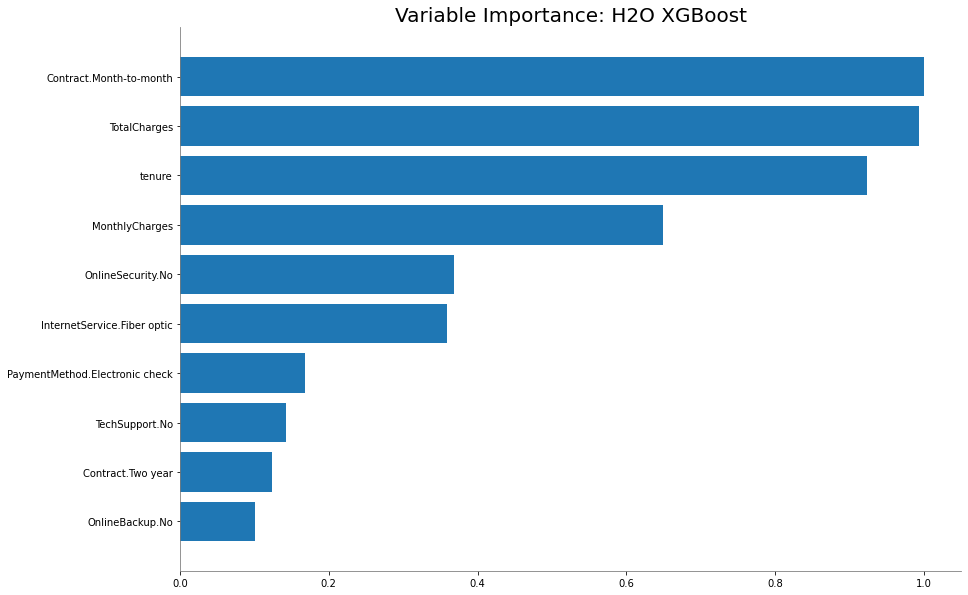

In [31]:
out.varimp_plot()

In [32]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20211119_103414.zip'

**Использованная литература:**

https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f
https://www.rdocumentation.org/packages/h2o/versions/3.34.0.3/topics/h2o.automl

https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv

https://github.com/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb